## <font color = '#0f0264'> <center> Referat laborator 05 </center></font>

Modificati titlul fisierului păstrând formatul acestuia, cu datele dvs:
- numar grupa
- nume
- prenume

Rulati codul indicat in celula de mai jos, care reprezinta o functie utilizata la afisarea formelor de unda ale marimilor electrice ale circuitelor analizate.

In [11]:
import matplotlib.pyplot as plt


def draw_waveforms(wf1, wf2, title1, title2):
    '''
    functia afiseaza intr-un grid 2 linii x 1 coloana
    variatiile in timp (formele de unda) ale marimilor 
    wf1 si wf2;
      wf1, wf2       = marimile pentru care se afiseaza formele de unda
      title1, title2 = "etichetele" marimilor electrice afisate 
    '''
    wfs    = (wf1, wf2)
    titles = (title1, title2)
    colors = ['black', 'blue']

    fig, axs = plt.subplots(nrows = 2, ncols = 1, figsize = (12,6))
    
    for i,ax in enumerate(axs):
        ax.set_title(titles[i])
        ax.set_xlabel(f'Time[{wfs[i].abscissa.unit}]')
        ax.set_ylabel(f'Voltage[{wfs[i].unit}]')
        ax.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
        ax.plot( np.array(wfs[i].abscissa),  np.array(wfs[i]), color = colors[i])
     
    plt.tight_layout()

## 1. Redresorul monoalternanta

#### 1.1. Redresorul monoalternanta fara filtru capacitiv

1. să se editeze circuitul indicat in Figura 1

<img src = '501.png' width = 250 height = 250>
<p style="text-align: center;">Figura 1</p>

Elementele redresorului sunt:
- sursa $V_{i}$ reprezinta o **sursa de tensiune sinusoidala**; parametrii tensiunii electrice generate sunt indicati in tabelul de mai jos; fiecare student isi va extrage valoarea in functie de numarul de ordine corespunzator;
- rezistorul $R_L$ reprezinta sarcina redresorului; valoarea rezistentei electrice $R_L$ este indicata in tabelul de mai jos; fiecare student isi va extrage valoarea in functie de numarul de ordine corespunzator.

|Numar   |amplitudine [V]  |frecventa [Hz]|RL [Ohm]       | C[uF]      |
|:------:|:---------------:|:------------:|:-------------:|:----------:|
|1       |15               |50            |120            |  220       |
|2       |15               |50            |150            |  220       |
|3       |15               |50            |180            |  220       |
|4       |15               |50            |220            |  220       |
|5       |15               |50            |240            |  220       |
|6       |20               |50            |270            |  220       |
|7       |20               |50            |310            |  220       |
|8       |20               |50            |330            |  220       |
|9       |20               |50            |370            |  220       |
|10      |20               |50            |390            |  220       |
|11      |25               |50            |430            |  220       |
|12      |25               |50            |470            |  220       |
|13      |25               |50            |510            |  220       |
|14      |25               |50            |560            |  220       |
|15      |25               |50            |620            |  220       |
|16      |22               |50            |680            |  330       |
|17      |22               |50            |690            |  330       |
|18      |22               |50            |720            |  330       |
|19      |22               |50            |750            |  330       |
|20      |22               |50            |820            |  330       |

Parametrii modelului diodei semiconductoare sunt urmatorii (fiecare studenti isi alege modelul diodei in functie de numarul de ordine):

|Numar   |Nume model dioda|IS [nA]   | RS [mOhm]   | BV [V]      | IBV [uA]  | N         | 
|:------:|:--------------:|:--------:|:-----------:|:-----------:|:---------:|:---------:|  
|1 - 8   |1N4001          |14.11     | 33.89       | 75          | 10        | 1.984     |
|9 - 20  |1N4007          |7.027     | 34.15       | 1000        | 0.05      | 1.808     |

2. sa se simuleze circuitul din Figura 1, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 10
  - numar puncte simulare, *POINTS* = 1000
3. sa se extraga din nodurile circuitului informatiile despre tensiunea de intrare $v_I$, respectiv de iesire $v_O$, ale circuitului 
4. sa se vizualizeze formele de unda ale tensiunilor de intrare $v_I$, respectiv de iesire $v_O$; in acest scop, se va apela functia `draw_waveforms()` implementata la inceputul laboratorului.

.title Redresor monoalternanta fara filtru capacitiv
Vi 1 0 DC 0V AC 1V SIN(0V 25V 50Hz 0s 0Hz)
D 1 2 D1N4007
RL 2 0 430Ohm
.model D1N4007 D (BV=1000V IBV=0.05uA IS=7.027nA N=1.808 RS=34.15mOhm)



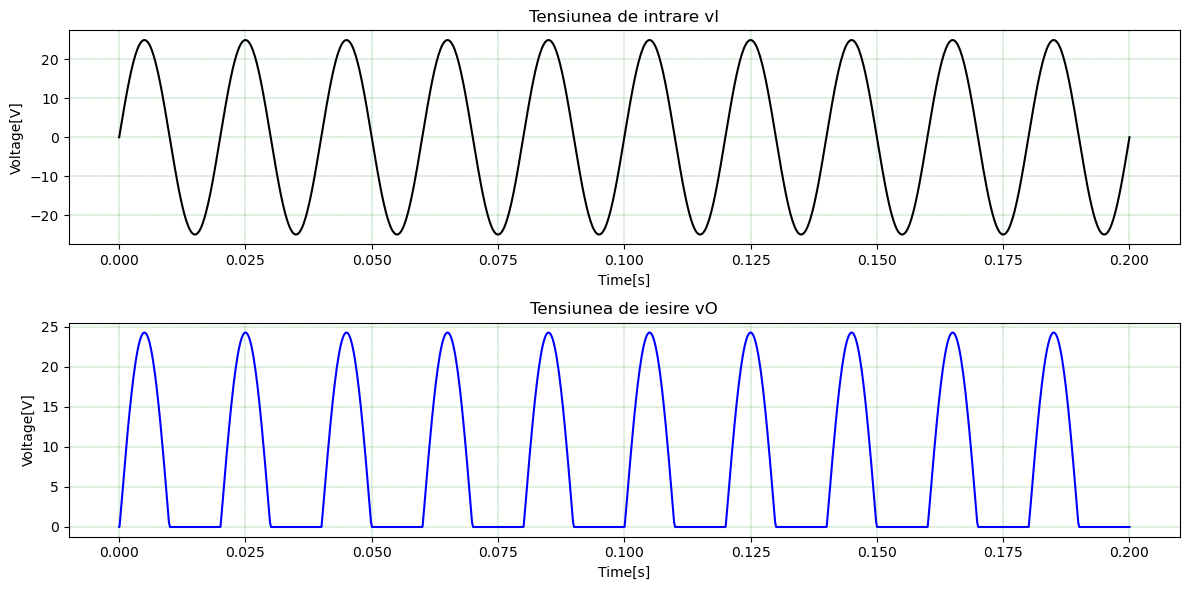

In [14]:
# import utilitare
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# instanta circuit

circuit1 = Circuit('Redresor monoalternanta fara filtru capacitiv')

# model dioda

circuit1.model('D1N4007', 'D', IS = 7.027@u_nA, RS = 34.15@u_mOhm, BV = 1000@u_V, IBV = 0.05@u_uA, N = 1.808)

# netlist


Vi = circuit1.SinusoidalVoltageSource('i', 1, 0, 
                                        offset = 0@u_V, 
                                        amplitude = 25@u_V, 
                                        frequency = 50@u_Hz)
D = circuit1.Diode('',   1,  2,    model = 'D1N4007')
RL = circuit1.R('L', 2, 0, 430@u_Ohm)

# afisare netlist

print(circuit1)

# date analiza: atribuiti valorile corecte parametrilor indicati mai jos:
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N      =  10     
POINTS =  1000   
PERIOD =  Vi.period

# instanta simulator
simulator1 = circuit1.simulator(nominal_temperature = 25, temperature = 25)

# analiza circuit si salvare rezultate analiza
analysis1 = simulator1.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS)

# extragere tensiune de intrare vi_M
vi_M = analysis1.nodes['1']

# extragere tensiune de iesire vo_M
vo_M = analysis1.nodes['2']

# afisare forme de unda redresor monoalternanta
draw_waveforms(vi_M, vo_M, 'Tensiunea de intrare vI', 'Tensiunea de iesire vO')


- sa se afiseze raspunsul la intrebarea urmatoare: 
<br>*Care este valoarea factorului de ondulatie $\gamma$ pentru redresorul monoalternanta fara filtru capacitiv?*

In [14]:
# raspuns intrebare
print('Factorul de ondulatie Gamma pentru redresorul monoalternanta fara filtru capacitiv este egal aproximativ 1.21 .')

Factorul de ondulatie Gamma pentru redresorul monoalternanta fara filtru capacitiv este egal aproximativ 1.21 .


#### 1.2. Redresorul monoalternanta cu filtru capacitiv

1. să se editeze circuitul indicat in Figura 2; valoarea capacitatii electrice $C$ a condensatorului de filtrare este indicata in tabelul de la inceputul laboratorului; in circuitele practice, valoarea capacitatii electrice a condensatorului de filtrare este minim de ordinul sutelor de $\mu F$.

<img src = '503.png' width = 300 height = 200>
<p style="text-align: center;">Figura 2</p>

2. sa se simuleze circuitul din Figura 2 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 10
  - numar puncte simulare, *POINTS* = 1000

3. sa se extraga din nodurile circuitului informatiile despre tensiunea de intrare $v_I$, respectiv de iesire $v_O$, ale circuitului; 
4.  sa se determine variatia tensiunii de iesire $\Delta v_O$; in acest scop se va utiliza metoda indicata in documentatia laboratorului (vezi sectiunea 4), cu mentiunea ca, pentru a nu lua in calculul valorii minime a tensiunii $v_O$, valorile care sunt generate la inceputul simularii (care sunt aproximativ 0), este necesara eliminarea primelor 500 de valori; acest lucru se realizeaza prin utilizarea operatorului subscript `[]` asupra variabilei care reprezinta tensiunea $v_O$; exemplu:
```python 
    # valoarea minima se extrage dupa eliminarea primelor 500 de valori  
    vo[500:].min()
```
5. sa se calculeze cu formula din laborator (formula teoretica), valoarea variatiei tensiunii de iesire $\Delta v_O$;
6. sa se afiseze cele 2 valori obtinute;
7. sa se calculeze valoarea factorului de ondulatie $\gamma$ pentru redresorul monoalternanta cu filtru capacitiv, pe baza valorilor parametrilor circuitului;
8. sa se vizualizeze formele de unda ale tensiunilor de intrare $v_I$, respectiv de iesire $v_O$; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului.

.title Redresor monoalternanta fara filtru capacitiv
Vi 1 0 DC 0V AC 1V SIN(0V 25V 50Hz 0s 0Hz)
D 1 2 D1N4007
RL 2 0 430Ohm
C 2 0 220uF
.model D1N4007 D (BV=1000V IBV=0.05uA IS=7.027nA N=1.808 RS=34.15mOhm)

delta_vo_MC_masurat = 24.238571911131125
delta_vo_MC_teoretic = 5.124433807850132e-06
gamma_MC = 6.10306838466835e-08


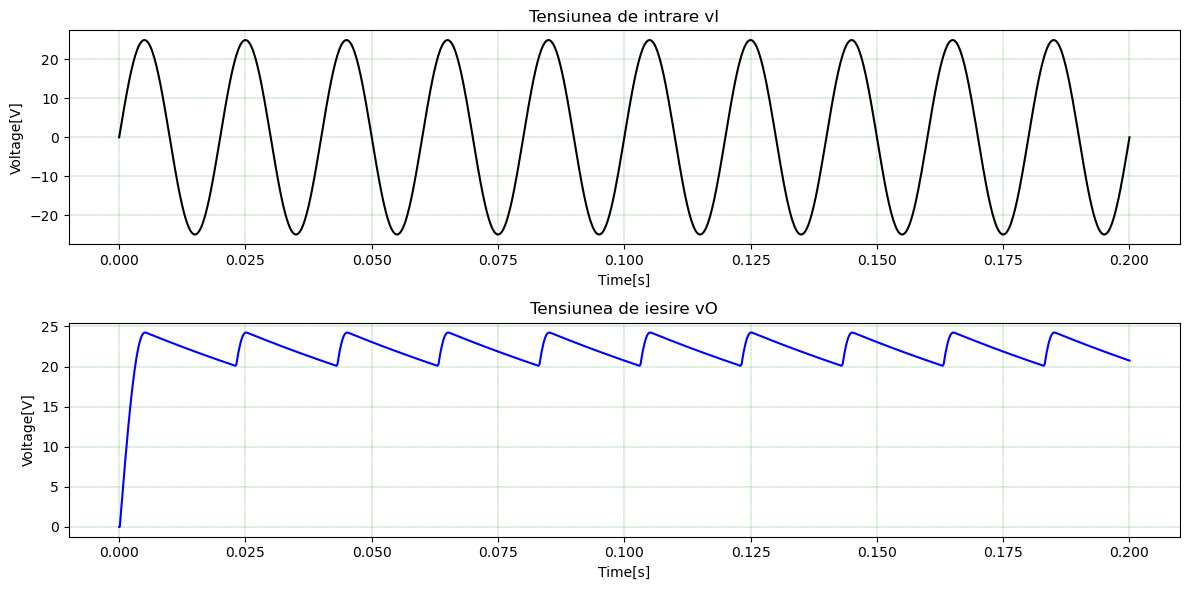

In [43]:
# import utilitare

from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *

# instanta circuit

circuit2 = Circuit('Redresor monoalternanta fara filtru capacitiv')

# model dioda

circuit2.model('D1N4007', 'D', IS = 7.027@u_nA, RS = 34.15@u_mOhm, BV = 1000@u_V, IBV = 0.05@u_uA, N = 1.808)

# netlist


Vi = circuit2.SinusoidalVoltageSource('i', 1, 0, 
                                        offset = 0@u_V, 
                                        amplitude = 25@u_V, 
                                        frequency = 50@u_Hz)
D = circuit2.Diode('',   1,  2,    model = 'D1N4007')
RL = circuit2.R('L', 2, 0, 430@u_Ohm)
C = circuit2.C('', 2, 0, 220@u_uF)

# afisare netlist

print(circuit2)

# date analiza: atribuiti valorile corecte parametrilor indicati mai jos:
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N      =  10    
POINTS =  1000  
PERIOD =  Vi.period

# instanta simulator
simulator2 = circuit2.simulator(nominal_temperature = 25, temperature = 25)

# analiza circuit si salvare rezultate analiza
analysis2 = simulator2.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS)

# extragere tensiune de intrare vi_MC
vi_MC = analysis2.nodes['1']

# extragere tensiune de iesire vo_MC
vo_MC = analysis2.nodes['2']

# calcul valoare delta_vo_MC_masurat (dupa metoda din lab., sectiunea 4):
delta_vo_MC_masurat = vo_MC.max() - vo_MC.min()

# calcul delta_vo_MC_teoretic (cu formula din laborator)
delta_vo_MC_teoretic = vo_MC.max()/(50*430*220)

# calcul gamma: 
gamma_MC = 1/(2*math.sqrt(3)*50*430*220)

# afisare valoare delta_vo_MC_masurat:
print(f'delta_vo_MC_masurat = {delta_vo_MC_masurat}')

# afisare valoare delta_vo_MC_teoretic:
print(f'delta_vo_MC_teoretic = {delta_vo_MC_teoretic}')

# afisare gamma
print(f'gamma_MC = {gamma_MC}')

# afisare forme de unda redresor monoalternanta cu filtru capacitiv
draw_waveforms(vi_MC, vo_MC, 'Tensiunea de intrare vI', 'Tensiunea de iesire vO')

## 2. Redresorul bialternanta

#### 2.1. Redresorul bialternanta fara filtru capacitiv

1. să se editeze circuitul indicat in Figura 3; pentru elementele circuitului se pastreaza datele de la redresorul monoalternanta;

<img src = '505.png' width = 300 height = 250>
<p style="text-align: center;">Figura 3</p>

2. sa se simuleze circuitul din Figura 3 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 10
  - numar puncte simulare, *POINTS* = 1000
3. sa se extraga din nodurile circuitului informatiile despre tensiunea de intrare $v_I$, respectiv de iesire $v_O$, ale circuitului 
4. sa se vizualizeze formele de unda ale tensiunilor de intrare $v_I$, respectiv de iesire $v_O$; in acest scop, se va apela functia `draw_waveforms()` implementata la inceputul laboratorului.

.title Redresor bialternanta fara filtru capacitiv
Vi 1 3 DC 0V AC 1V SIN(0V 25V 50Hz 0s 0Hz)
D1 1 2 D1N4007
D2 0 3 D1N4007
D3 0 1 D1N4007
D4 3 2 D1N4007
RL 2 0 430Ohm
.model D1N4007 D (BV=1000V IBV=0.05uA IS=7.027nA N=1.808 RS=34.15mOhm)



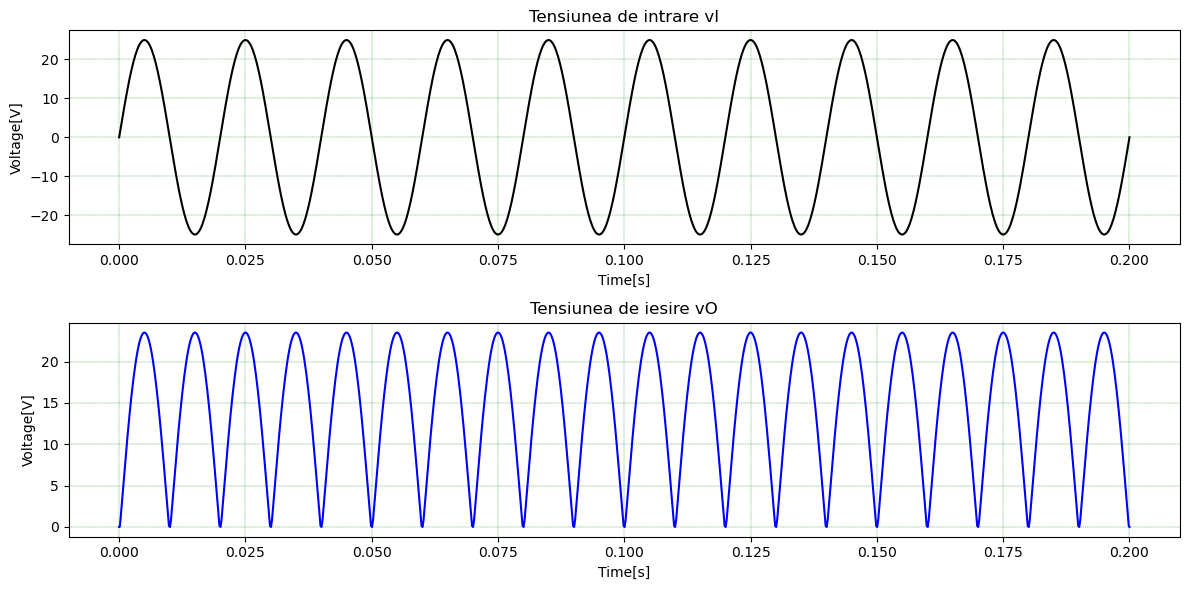

In [34]:
# import utilitare
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
# instanta circuit
circuit3 = Circuit('Redresor bialternanta fara filtru capacitiv')

# model dioda
circuit3.model('D1N4007', 'D', IS = 7.027@u_nA, RS = 34.15@u_mOhm, BV = 1000@u_V, IBV = 0.05@u_uA, N = 1.808)
# netlist

Vi = circuit3.SinusoidalVoltageSource('i', 1, 3, 
                                        offset = 0@u_V, 
                                        amplitude = 25@u_V, 
                                        frequency = 50@u_Hz)
D1 = circuit3.Diode('1',   1,  2,    model = 'D1N4007')
D2 = circuit3.Diode('2',   0,  3,    model = 'D1N4007')
D3 = circuit3.Diode('3',   0,  1,    model = 'D1N4007')
D4 = circuit3.Diode('4',   3,  2,    model = 'D1N4007')
RL = circuit3.R('L', 2, 0, 430@u_Ohm)
# afisare netlist

print(circuit3)
# date analiza: atribuiti valorile corecte parametrilor indicati mai jos:
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N      =  10    
POINTS =  1000   
PERIOD =  Vi.period

# instanta simulator
simulator3 = circuit3.simulator(nominal_temperature = 25, temperature = 25)

# analiza circuit si salvare rezultate analiza
analysis3 = simulator3.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS)

# extragere tensiune de intrare vi_B
vi_B = analysis3.nodes['1'] - analysis3.nodes['3']

# extragere tensiune de iesire vo_B
vo_B = analysis3.nodes['2']

# afisare forme de unda redresor bialternanta
draw_waveforms(vi_B, vo_B, 'Tensiunea de intrare vI', 'Tensiunea de iesire vO')

- sa se afiseze raspunsul la intrebarea urmatoare: <br>*Care este valoarea factorului de ondulatie $\gamma$ pentru redresorul bialternanta fara filtru capacitiv?*

In [36]:
# raspuns intrebare 
print('Factorul de ondulatie Gamma pentru redresorul bialternanta fara filtru capacitiv este egal aproximativ 0.48 .')

Factorul de ondulatie Gamma pentru redresorul bialternanta fara filtru capacitiv este egal aproximativ 0.48 .


#### 2.2. Redresorul bialternanta cu filtru capacitiv

1. să se editeze circuitul indicat in Figura 4; pentru valoarea capacitatii electrice $C$ a condensatorului de filtrare se pastreaza valoarea utilizata pentru redresorul monoalternanta.

<img src = '507.png' width = 300 height = 200>
<p style="text-align: center;">Figura 4</p>

2. sa se simuleze circuitul din Figura 4 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 10
  - numar puncte simulare, *POINTS* = 1000
3. sa se extraga din nodurile circuitului informatiile despre tensiunea de intrare $v_I$, respectiv de iesire $v_O$, ale circuitului; 
4.  sa se determine variatia tensiunii de iesire $\Delta v_O$; in acest scop se va utiliza metoda indicata in documentatia laboratorului (vezi sectiunea 4), cu mentiunea ca, pentru a nu lua in determinarea valorii minime a tensiunii $v_O$, valorile care sunt generate la inceputul simularii (care sunt aproximativ 0), este necesara eliminarea primelor 500 de valori; acest lucru se realizeaza prin utilizarea operatorului subscript `[]` asupra variabilei care reprezinta tensiunea $v_O$; exemplu:
```python 
    # valoarea minima se extrage dupa eliminarea primelor 500 de valori  
    vo[500:].min()
```
5. sa se calculeze cu formula din laborator (formula teoretica), valoarea variatiei tensiunii de iesire $\Delta v_O$;
6. sa se afiseze cele 2 valori obtinute;
7. sa se calculeze valoarea factorului de ondulatie $\gamma$ pentru redresorul bialternanta cu filtru capacitiv, pe baza valorilor parametrilor circuitului;
8. sa se vizualizeze formele de unda ale tensiunilor de intrare $v_I$, respectiv de iesire $v_O$; in acest scop, se va apela functia `draw_waveforms()`, implementata la inceputul laboratorului.

.title Redresor bialternantaq cu filtru capacitiv
Vi 2 4 DC 0V AC 1V SIN(0V 25V 50Hz 0s 0Hz)
D1 2 3 D1N4007
D2 1 4 D1N4007
D3 1 2 D1N4007
D4 4 3 D1N4007
RL 3 0 430Ohm
C 3 0 220uF
.model D1N4007 D (BV=1000V IBV=0.05uA IS=7.027nA N=1.808 RS=34.15mOhm)

delta_vo_BC_masurat = 24.9315713826677
delta_vo_BC_teoretic = 2.635472661956516e-06
gamma_BC = 3.051534192334175e-08


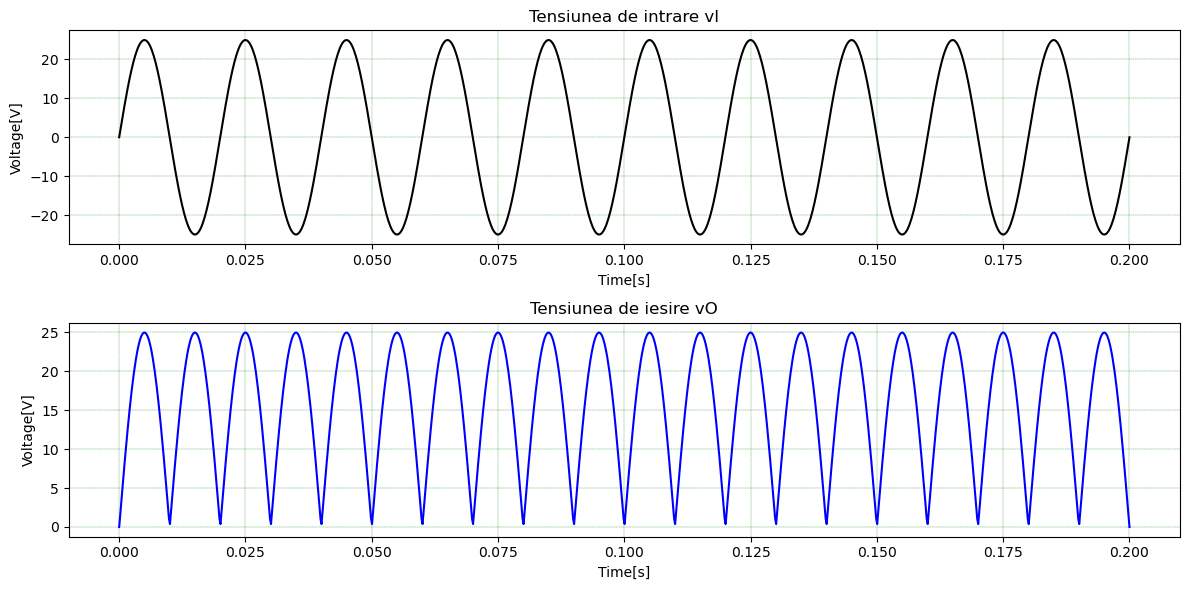

In [47]:
# import utilitare
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import math

# instanta circuit
circuit4 = Circuit('Redresor bialternantaq cu filtru capacitiv')

# model dioda

circuit4.model('D1N4007', 'D', IS = 7.027@u_nA, RS = 34.15@u_mOhm, BV = 1000@u_V, IBV = 0.05@u_uA, N = 1.808)

# netlist

Vi = circuit4.SinusoidalVoltageSource('i', 2, 4, 
                                        offset = 0@u_V, 
                                        amplitude = 25@u_V, 
                                        frequency = 50@u_Hz)
D1 = circuit4.Diode('1',   2,  3,    model = 'D1N4007')
D2 = circuit4.Diode('2',   1,  4,    model = 'D1N4007')
D3 = circuit4.Diode('3',   1,  2,    model = 'D1N4007')
D4 = circuit4.Diode('4',   4,  3,    model = 'D1N4007')
RL = circuit4.R('L', 3, 0, 430@u_Ohm)
C = circuit4.C('', 3, 0, 220@u_uF)
# afisare netlist

print(circuit4)
# date analiza: atribuiti valorile corecte parametrilor indicati mai jos:
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N      =  10   
POINTS =  1000  
PERIOD =  Vi.period

# instanta simulator
simulator4 = circuit4.simulator(nominal_temperature = 25, temperature = 25)

# analiza circuit si salvare rezultate analiza
analysis4 = simulator4.transient(end_time = N*PERIOD, step_time = N*PERIOD/POINTS)
# extragere tensiune de intrare vi_BC
vi_BC = analysis4.nodes['2'] - analysis4.nodes['4']

# extragere tensiune de iesire vo_BC
vo_BC = analysis4.nodes['3'] - analysis4.nodes['1']

# calcul valoare delta_vo_BC_masurat (dupa metoda din lab., sectiunea 4):
delta_vo_BC_masurat = vo_BC.max() - vo_BC.min()

# calcul delta_vo_BC_teoretic (cu formula din laborator)
delta_vo_BC_teoretic = vo_BC.max()/(2*50*430*220)

# calcul gamma: 
gamma_BC = 1/(4*math.sqrt(3)*50*430*220)

# afisare valoare delta_vo_BC_masurat:

print(f'delta_vo_BC_masurat = {delta_vo_BC_masurat}')

# afisare valoare delta_vo_BC_teoretic:

print(f'delta_vo_BC_teoretic = {delta_vo_BC_teoretic}')

# afisare gamma

print(f'gamma_BC = {gamma_BC}')

# afisare forme de unda redresor bialternanta cu filtru capacitiv
draw_waveforms(vi_BC, vo_BC, 'Tensiunea de intrare vI', 'Tensiunea de iesire vO')
